<a href="https://colab.research.google.com/github/mounisha123-ram/Multiple-Disease-Prediction/blob/main/Project4_Kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:


df=pd.read_csv('/content/kidney_disease - kidney_disease.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
print(df['classification'].unique())
print(df['classification'].value_counts())

['ckd' 'notckd']
classification
ckd       250
notckd    150
Name: count, dtype: int64


In [ ]:
df.shape

(400, 26)

# **Column Name abbreviations **

Column Name	Likely Full Form / Meaning
id	Identifier for each record
age	Age of the patient
bp	Blood Pressure
sg	Specific Gravity (urine test)
al	Albumin (urine test)
su	Sugar (urine test)
rbc	Red Blood Cells (normal/abnormal)
pc	Pus Cells (normal/abnormal)
pcc	Pus Cell Clumps (present/not present)
ba	Bacteria (present/not present)
bgr	Blood Glucose Random
bu	Blood Urea
sc	Serum Creatinine
sod	Sodium level
pot	Potassium level
hemo	Hemoglobin
pcv	Packed Cell Volume
wc	White Blood Cell Count
rc	Red Blood Cell Count
htn	Hypertension (yes/no)
dm	Diabetes Mellitus (yes/no)
cad	Coronary Artery Disease (yes/no)
appet	Appetite (good/poor)
pe	Pedal Edema (yes/no)
ane	Anemia (yes/no)
classification	Target variable (e.g., disease presence)


Key points:
These columns mostly correspond to kidney-related tests and general health conditions.

For heart disease datasets, you often see columns like cholesterol, thal, cp (chest pain type), restecg (resting ECG results), etc., which are not present here.

However, the columns htn, dm, and cad are directly related to heart conditions (hypertension, diabetes, coronary artery disease).



In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
#checking missing values
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
#percentage of the missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


In [ ]:
#to see the negative values in Each Column
(df.select_dtypes(include='number') < 0).sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0


In [ ]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
import pandas as pd

# Find all cells with special characters (non-alphanumeric, excluding space)
special_chars = df.applymap(lambda x: isinstance(x, str) and any(not c.isalnum() and not c.isspace() for c in x))

# Show rows and columns that contain special characters
df[special_chars.any(axis=1)]

<ipython-input-12-08588ce2ffd9>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  special_chars = df.applymap(lambda x: isinstance(x, str) and any(not c.isalnum() and not c.isspace() for c in x))


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


# **Handling NUll Values**

In [ ]:
#Convert object columns to numeric where needed
#These columns: pcv, wc, rc should be numeric but are now object.

# Convert strings to numeric (remove special characters if any)
for col in ['pcv', 'wc', 'rc']:
    df[col] = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)  # remove unwanted chars
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float, invalid to NaN


In [ ]:
df.dtypes #checking that have changed or not

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [ ]:
df.replace(['nan', 'NaN', 'NAN', 'Nan'], np.nan, inplace=True)
print(df.isnull().sum())

#explanation for code
#df['rbc'] = ['normal', 'nan', 'abnormal', 'NaN']
# df['rbc'] = ['normal', np.nan, 'abnormal', np.nan] itha tha pannum

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [ ]:
#handle missing values
#Numeric columns: --> Use mean/median for filling.

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

#Categorical columns:
#Use mode (most common value)

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [ ]:
#drop the unnecessary column id
df.drop('id', axis=1, inplace=True)

In [ ]:
df.shape

(400, 25)

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
#rename the column because the target colmn doesnt make sense
df.rename(columns={'classification': 'status'}, inplace=True)
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'status'],
      dtype='object')

In [ ]:
df.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


# **EDA**

In [ ]:
df.select_dtypes(include=['int64',"float64"])

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [ ]:
df.select_dtypes(exclude=['int64',"float64"])

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,status
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'status'],
      dtype='object')

In [ ]:
# Checking the Outliers and Distributions using Plotly

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 🟪 Box Plots (for Outlier Detection)
for col in numerical_cols:
    fig = px.box(df, y=col, title=f'📦 Box Plot of {col}', points="all", template="plotly_white")
    fig.update_layout(yaxis_title=col, title_x=0.5)
    fig.show()

In [ ]:
# 🔷 Histograms with Rug Plot (for Distribution)
for col in numerical_cols:
    fig = px.histogram(df, x=col, title=f'📊 Histogram of {col}', marginal="rug", nbins=30, template="plotly_white")
    fig.update_layout(xaxis_title=col, title_x=0.5)
    fig.show()

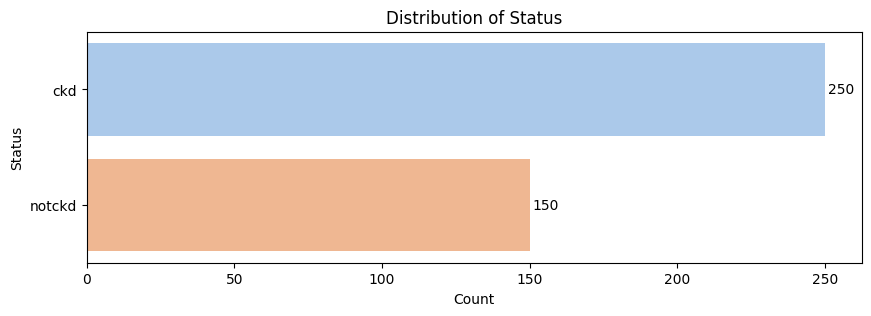

In [ ]:
# Countplot for status (target column)
plt.figure(figsize=(10, 3))
ax = sns.countplot(y='status', data=df, palette='pastel')
plt.title("Distribution of Status")
plt.xlabel("Count")
plt.ylabel("Status")

# Add count labels on bars
for p in ax.patches:
    count = int(p.get_width())
    ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2, count, va='center')

plt.show()

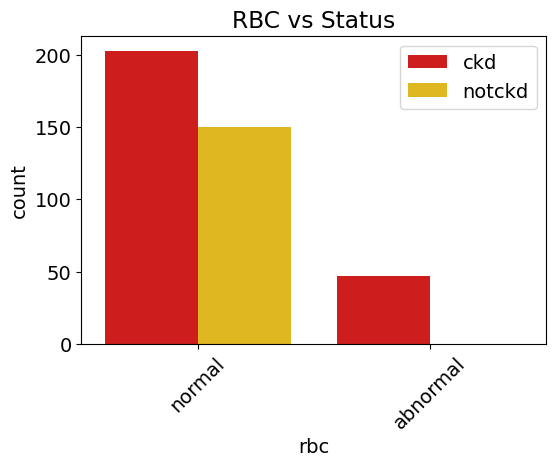

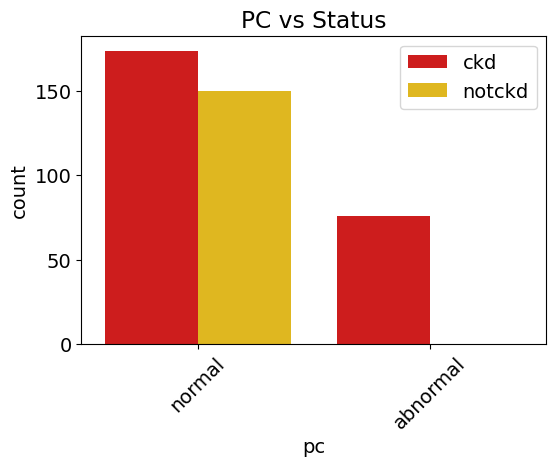

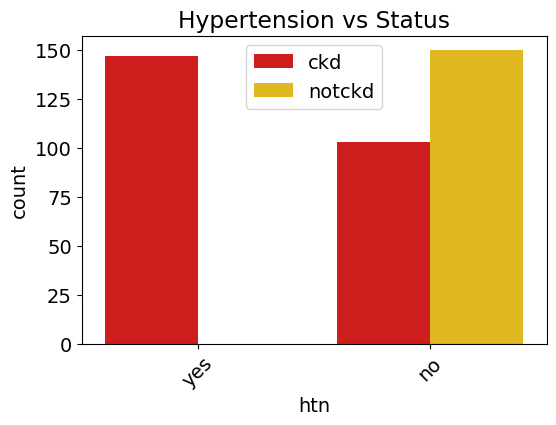

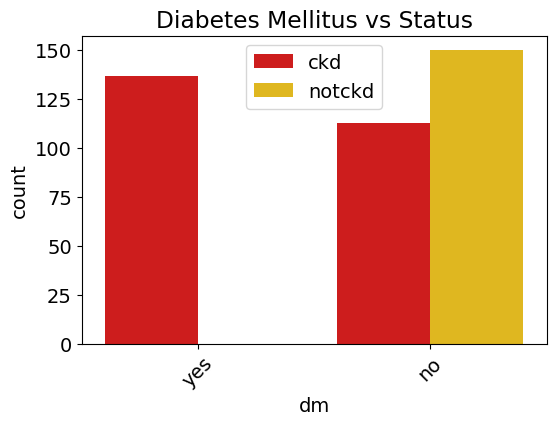

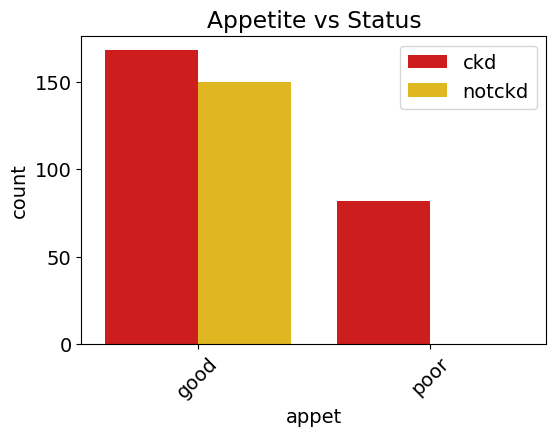

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# RBC vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='rbc', hue='status', data=df, palette='hot')
plt.title("RBC vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# PC vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='pc', hue='status', data=df, palette='hot')
plt.title("PC vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# HTN vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='htn', hue='status', data=df, palette='hot')
plt.title("Hypertension vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# DM vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='dm', hue='status', data=df, palette='hot')
plt.title("Diabetes Mellitus vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# Appet vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='appet', hue='status', data=df, palette='hot')
plt.title("Appetite vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_bar_labels(ax):
    """Add count labels on top of bars"""
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(str(count),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 8),
                    textcoords='offset points', fontsize=10)

# RBC vs Status
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='rbc', hue='status', data=df, palette='hot')
plt.title("RBC vs Status")
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()

# PC vs Status
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='pc', hue='status', data=df, palette='hot')
plt.title("PC vs Status")
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

def add_bar_labels(ax):
    """Add count labels on top of bars"""
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(str(count),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 8),
                    textcoords='offset points', fontsize=10)

# RBC vs Status
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='rbc', hue='status', data=df, palette='hot')
plt.title("RBC vs Status")
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()

# PC vs Status
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='pc', hue='status', data=df, palette='hot')
plt.title("PC vs Status")
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()

# HTN vs Status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='htn', hue='status', data=df, palette='hot')
plt.title("Hypertension vs Status")
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()

# DM vs Status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='dm', hue='status', data=df, palette='hot')
plt.title("Diabetes Mellitus vs Status")
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()

# Appet vs Status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='appet', hue='status', data=df, palette='hot')
plt.title("Appetite vs Status")
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()

# DM vs Status
plt.figure(figsize=((10, 6))
ax = sns.countplot(x='dm', hue='status', data=df, palette='hot')
plt.title("Diabetes Mellitus vs Status")
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()

# Appet vs Status
plt.figure(figsize=((10, 6))
ax = sns.countplot(x='appet', hue='status', data=df, palette='hot')
plt.title("Appetite vs Status")
plt.xticks(rotation=45)
plt.legend(loc='best')
add_bar_labels(ax)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-53-69eab4da232f>, line 102)